### Testing idea of inferring management intensity from mNFI stand volumes

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
EPS = np.finfo(float).eps
from get_mNFI import sample_mNFI, load_mNFI_rasters

# SLA = {'pine': 5.54, 'spruce': 5.65, 'birch': 18.46}  # m2/kg, Kellomäki et al. 2001 Atm. Env.
SLA = {'pine': 6.8, 'spruce': 4.7, 'birch': 14.0}  # Härkönen et al. 2015 BER 20, 181-195

In [ ]:
# sitetype = Site fertility class 2019 (1-10): 
	#1=lehto tai vastaava suo (tvs) herb-rich forest /herb-rich hw-spruce swamps, pine mires, fens,  
	#2=lehtomainen kangas tvs,herb-rich heat f. /V.myrtillus / tall sedge spruce swamps, tall sedge pine fens, tall sedge fens, 
	#3=tuore kangas tvs, mesic heath f. / Carex clobularis / V.vitis-idaea swamps, Carex globularis pine swamps, low sedge (oligotrophic) fens,
	#4=kuivahko kangas tvs, sub-xeric heath f./Low sedge, dwarf-shrub & cottongrass pine bogs, ombo-oligotrophic bogs,
	#5= kuiva kangas tvs , xeric heath f. / S.fuscum pine bogs, ombotrophic and S.fuscum low sedge bogs.
	#6=karukkokangas tvs, barren heath f. / 
	#7=kalliomaa, hietikko tai vesijÃ¤ttÃ¶maa, rock,cliff or sand f. 
	#8=lakimetsÃ¤, 
	#9=tunturikoivikko, 
	#10=avotunturi

    #mvmi_maintype= Site main class 2019 (1-4); 1=mineral soil, 2= spruce mire, 3= pine bog, 4=open peatland
    #32766 is a missing value: the pixel belongs to forestry land but without satellite image cover 
    #32767 is a null value: the pixel does not belong to forestry land or is outside of the country

In [4]:
# load needed rasters
# get data from 'species'-dominated stands (volume fraction >0.9), mineral soil (maintype=1), sub-xeric (sitetype=4) forests
species = ('pine', 0.9)
#species = ('spruce', 0.9)
#species = ('birch', 0.9)

layers = ['maintype', 'sitetype', 'vol', 'age']

nfi = load_mNFI_rasters(layers)

In [11]:
# get subset from 'mesic' on 'mineral soil'
maintype = 1
sitetype = 3

mask = np.where((nfi['maintype'] == maintype) & (nfi['sitetype'] == sitetype))

vol_mesic = nfi['vol'][mask]
age_mesic = nfi['age'][mask]

(23898251,)


Text(0.5, 0, 'manag intensity [-]')

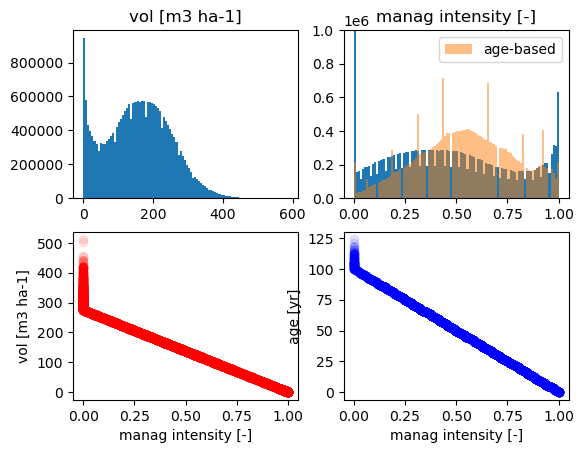

In [13]:
print(np.shape(vol_mesic))

fig, ax = plt.subplots(2,2)
ax[0,0].hist(vol_mesic, bins=100); ax[0,0].set_title('vol [m3 ha-1]')

# threshold value for old-growth volume
vol_old = np.quantile(vol_mesic, 0.9)
age_old = 100.0

# management intensity is linearly related to stem volume:
manag_intensity = 1 - (np.minimum(vol_mesic / vol_old, 1.0))
manag_intensity_age = 1 - (np.minimum(age_mesic / age_old, 1.0))

sample = range(0,10000) # subset for scatterplot

ax[0,1].hist(manag_intensity, bins=100); ax[0,1].set_title('manag intensity [-]')
ax[0,1].hist(manag_intensity_age, bins=100, alpha=0.5, label='age-based')
ax[0,1].legend()
ax[0,1].set_ylim(0,1e6)
ax[1,0].plot(manag_intensity[sample], vol_mesic[sample], 'ro', alpha=0.1)
ax[1,0].set_ylabel('vol [m3 ha-1]')
ax[1,0].set_xlabel('manag intensity [-]')

ax[1,1].plot(manag_intensity_age[sample], age_mesic[sample], 'bo', alpha=0.1)
ax[1,1].set_ylabel('age [yr]')
ax[1,1].set_xlabel('manag intensity [-]')

In [1]:
plt.plot(manag_intensity, vol_mesic,'r.')

NameError: name 'plt' is not defined